In [1]:

import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

foot_path = "../draw_model_result/"

In [6]:
with open(foot_path+'rec_immers_dict.json', 'r') as f:
    rec_immers_dict = json.load(f)

1142 0.5002487012676099
2366 0.44351309898135427
1088 0.5052799767650226
2420 0.44251710508973147


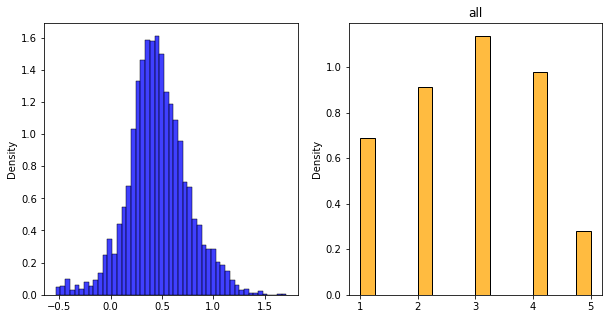

In [2]:
with open(foot_path+'source_dict.json', 'r') as f:
    lab_data_dict = json.load(f)

pred_immers_all=[]
true_immers_all=[]
pred_immers_viewpos, pred_immers_viewneg = [], []
pred_immers_likepos, pred_immers_likeneg = [], []
for user in lab_data_dict:
    for item in lab_data_dict[user]:
        data = lab_data_dict[user][item]
        pred_immers = data['predict_immersin']
        pred_immers_all.append(pred_immers)
        true_immers_all.append(data['rating_immersion'])
        if data['rating_like']>0:
            pred_immers_likepos.append(pred_immers)
        else:
            pred_immers_likeneg.append(pred_immers)
        if data['view_ratio']>0.95:
            pred_immers_viewpos.append(pred_immers)
        else:
            pred_immers_viewneg.append(pred_immers)
        
print(len(pred_immers_viewpos),np.mean(pred_immers_viewpos))
print(len(pred_immers_viewneg),np.mean(pred_immers_viewneg))
print(len(pred_immers_likepos),np.mean(pred_immers_likepos))
print(len(pred_immers_likeneg),np.mean(pred_immers_likeneg))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(pred_immers_all, color='blue', kde=False, stat='density')

plt.subplot(1, 2, 2)
sns.histplot(true_immers_all, color='orange', kde=False, stat='density')
plt.title('all')
plt.show()

In [3]:
original_array = np.array(pred_immers_all)
print(min(pred_immers_all))
print(max(pred_immers_all))
# pred_immers_all_nor = list(np.array(pred_immers_all) - np.min(pred_immers_all)) / (np.max(pred_immers_all) - np.min(pred_immers_all))
pred_immers_all_nor = list(np.array(pred_immers_all) - np.min(pred_immers_all)) / (np.max(pred_immers_all) - np.min(pred_immers_all))

true_immers_all_nor = list((np.array(true_immers_all) - 1) / (5-1))

-0.5347451567649841
1.7120873928070068


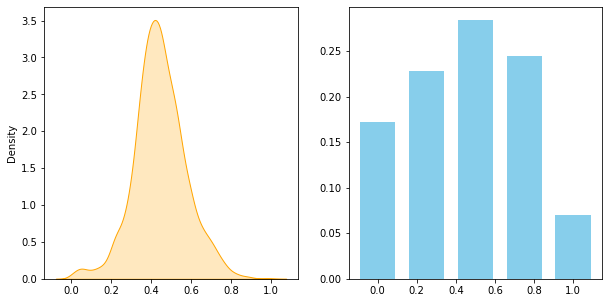

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(pred_immers_all_nor, color='orange', fill=True, label='predict immersion')
plt.subplot(1, 2, 2)
values=[0,0,0,0,0]
for immers in true_immers_all:
    for i in range(5):
        if immers==float(i+1):
            values[i]+=1
total_sum = sum(values)
new_list = [x / total_sum for x in values]
plt.bar([0,0.25,0.5,0.75,1], new_list, width=0.18, color='skyblue')
    
plt.show()

In [4]:
with open('../rec_immers_dict.json', 'r') as f:
    MV_rec_immers_dict = json.load(f)

In [7]:
MV_data = MV_rec_immers_dict['train']['item_pos_immers'] + MV_rec_immers_dict['train']['item_neg_immers'] + MV_rec_immers_dict['devtest']['item_pos_immers'] + MV_rec_immers_dict['devtest']['item_neg_immers']
MV_sampled_data = np.random.choice(MV_data, size=10000, replace=False)
Kuai_data = rec_immers_dict['train']['item_pos_immers']+rec_immers_dict['train']['item_neg_immers']+rec_immers_dict['devtest']['item_pos_immers']+rec_immers_dict['devtest']['item_neg_immers']
Kuai_sampled_data = np.random.choice(Kuai_data, size=10000, replace=False)

In [ ]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

sns.kdeplot(pred_immers_all_nor, color='orange', fill=True, label='Small Data', shade=True, alpha=0.7)
sns.kdeplot(MV_sampled_data, color='LimeGreen', fill=True, label='MicroVideo', shade=True, alpha=0.5)
sns.kdeplot(Kuai_sampled_data,  color='MediumPurple', fill=True, label='KuaiRand', shade=True, alpha=0.4)
plt.legend(fontsize=18,loc='upper left')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Predicted Immersion Score', fontsize=18)
plt.ylabel('Density', fontsize=18)

plt.subplot(1, 2, 2)
values=[0,0,0,0,0]
for immers in true_immers_all:
    for i in range(5):
        if immers==float(i+1):
            values[i]+=1
total_sum = sum(values)
new_list = [x / total_sum for x in values]
plt.bar([0,0.25,0.5,0.75,1], new_list, width=0.18, color='skyblue')
plt.xlabel('Immersion Label', fontsize=18)
plt.ylabel('Proportion', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()

plt.savefig('/work/hzy/douyin/work_202306/big_data_analysis/draw_model_result/immersion_distribution1.pdf')
plt.show()

In [ ]:

plt.figure(figsize=(5.5, 4))

sns.kdeplot(pred_immers_all_nor, color='orange', fill=True, label='Small Data', shade=True, alpha=0.7)
sns.kdeplot(MV_sampled_data, color='LimeGreen', fill=True, label='MicroVideo', shade=True, alpha=0.5)
sns.kdeplot(Kuai_sampled_data,  color='MediumPurple', fill=True, label='KuaiRand', shade=True, alpha=0.4)
plt.legend(fontsize=17,loc='upper left')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Predicted Immersion Score', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.ylim(0,6.5)

plt.savefig('../immersion_distribution.pdf')
plt.show()

In [ ]:

plt.figure(figsize=(5.5, 4))

sns.kdeplot(pred_immers_all_nor, color='orange', fill=True, label='Small Data', shade=True, alpha=0.7)
sns.kdeplot(MV_sampled_data, color='LimeGreen', fill=True, label='MicroVideo', shade=True, alpha=0.5)
sns.kdeplot(Kuai_sampled_data,  color='MediumPurple', fill=True, label='KuaiRand', shade=True, alpha=0.4)
plt.legend(fontsize=17,loc='upper left')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Predicted Immersion Score', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.ylim(0,6.5)
plt.xlim(0,1)

plt.savefig('../immersion_distribution.pdf')
plt.show()